## Data Exploration

In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [37]:
train_df = pd.read_csv('python_practise/Titanic_train.csv')
test_df = pd.read_csv('python_practise/Titanic_test.csv')

In [38]:
train_df.info()
train_df.head()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
test_df.info()
test_df.head()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

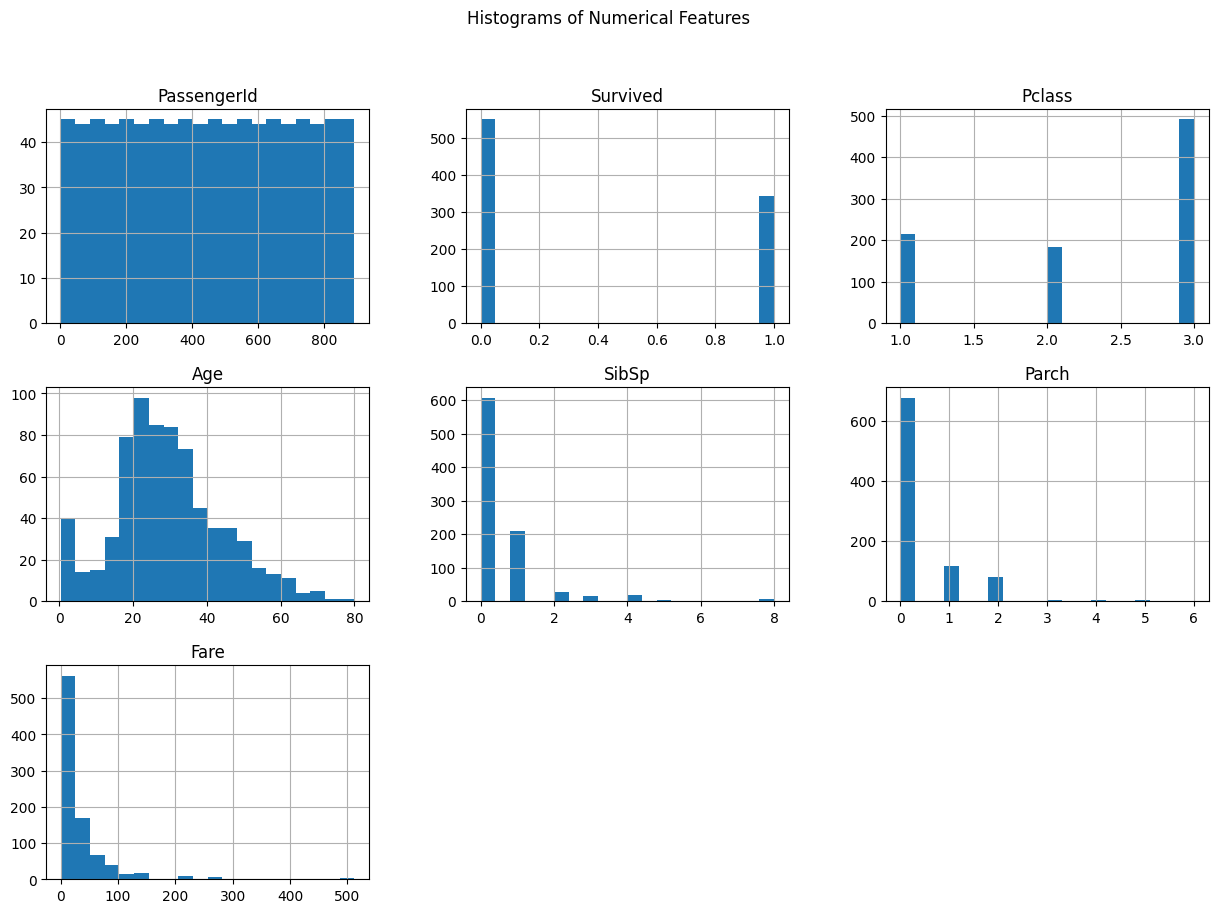

In [41]:
train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

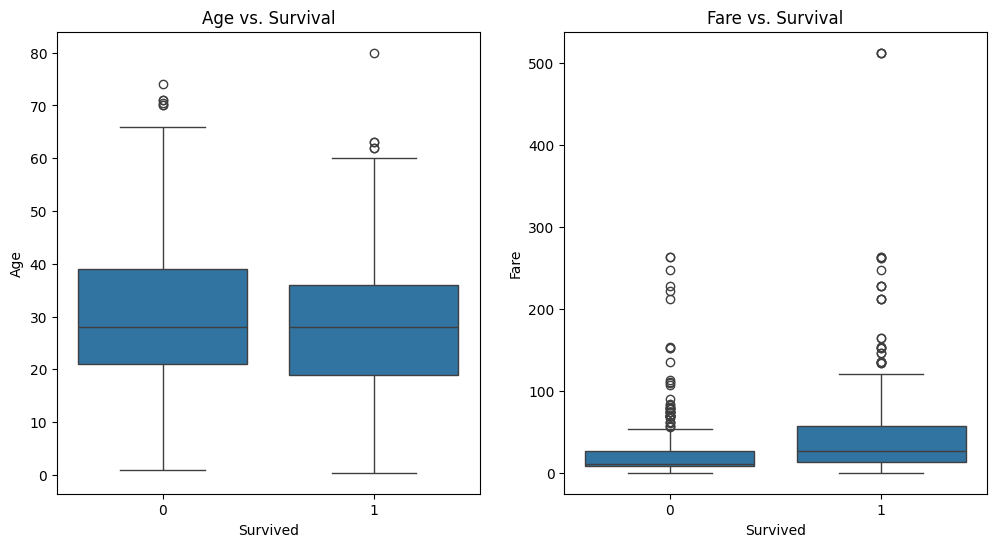

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs. Survival')
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare vs. Survival')
plt.show()

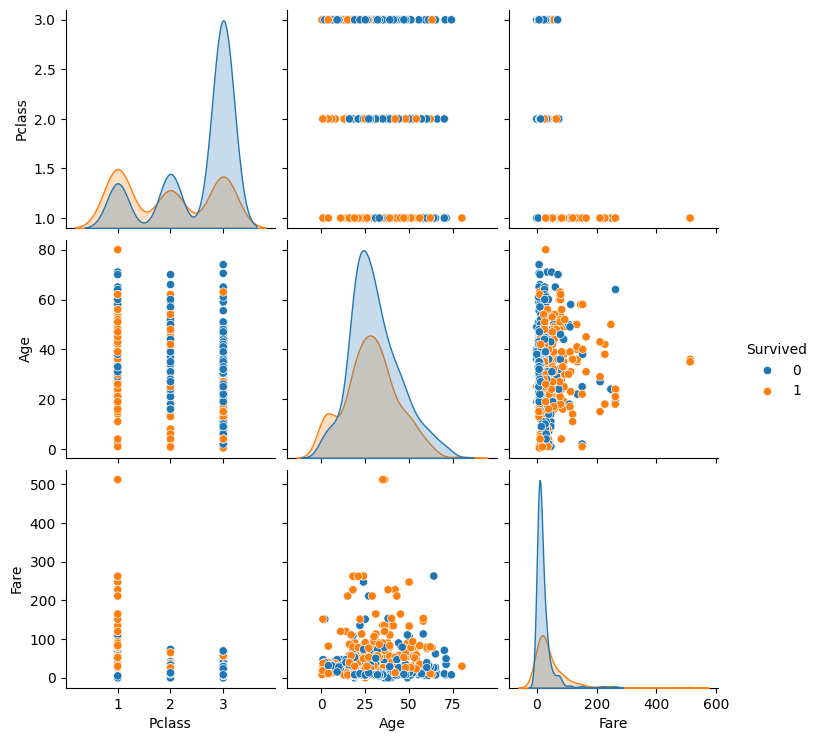

In [43]:
 sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')

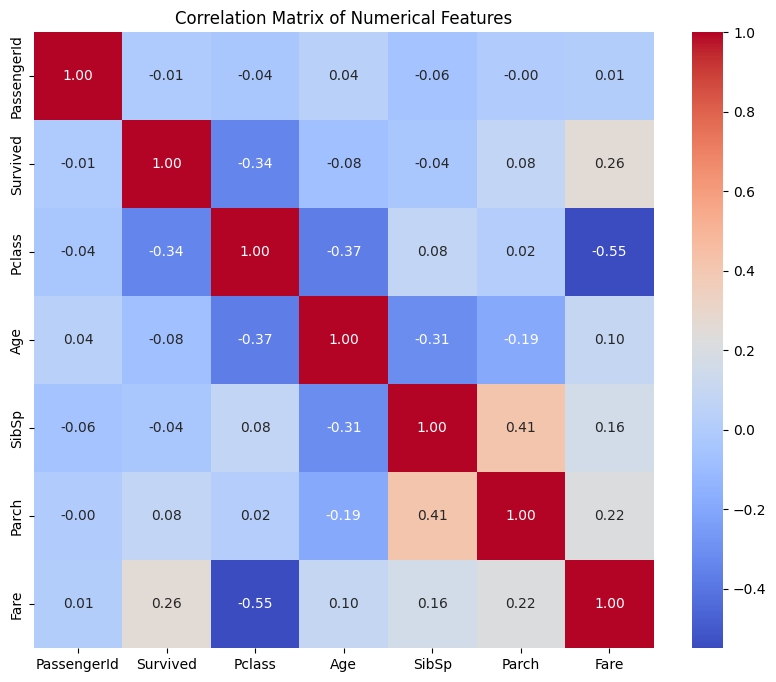

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### - Missing values in 'Age', 'Cabin', 'Embarked' in the training set and 'Age', 'Fare', 'Cabin' in the test set.
### - 'Survived' is the target variable. 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' appear to be important features.
### - 'PassengerId', 'Name', 'Ticket', and 'Cabin' are likely not directly useful for the model and will be dropped.
### - There's a positive correlation between 'Fare' and 'Survived'. 'Pclass' and 'Survived' have a negative correlation.

## Data Preprocessing

In [45]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [46]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [47]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [48]:
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)

In [49]:
combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [50]:
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked'], drop_first=True)

In [51]:
X_train = combined_df[:len(train_df)]
X_test = combined_df[len(train_df):]
y_train = train_df['Survived']

## Model Building

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [55]:
X = combined_df[:len(train_df)]
y = train_df['Survived']

In [56]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
log_reg_model_split = LogisticRegression(max_iter=1000)
log_reg_model_split.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = log_reg_model_split.predict(X_test_split)
y_pred_proba = log_reg_model_split.predict_proba(X_test_split)[:, 1]

In [59]:
accuracy = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred)
recall = recall_score(y_test_split, y_pred)
f1 = f1_score(y_test_split, y_pred)
roc_auc = roc_auc_score(y_test_split, y_pred_proba)

In [60]:
print("\nModel Evaluation on a new split:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Model Evaluation on a new split:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639
ROC-AUC Score: 0.8825


In [61]:
fpr, tpr, thresholds = roc_curve(y_test_split, y_pred_proba)

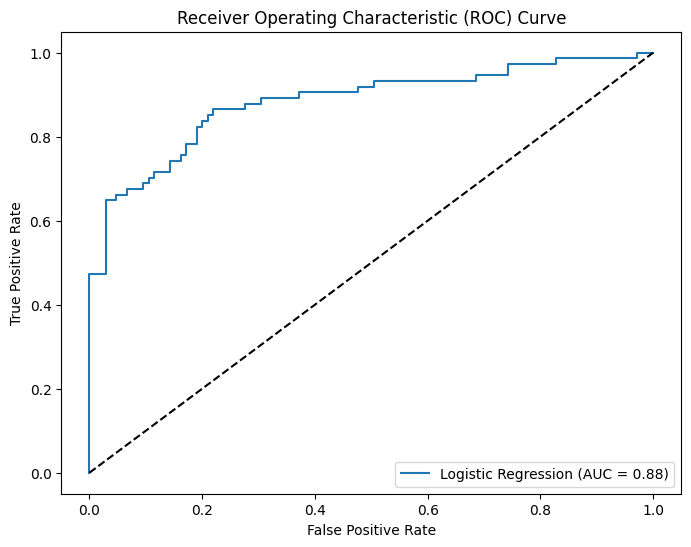

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Interpretation

In [63]:
coefficients = log_reg_model_split.coef_[0]
feature_names = X_train_split.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Odds_Ratio'] = np.exp(coeff_df['Coefficient'])
print("\nModel Coefficients and Odds Ratios:")
print(coeff_df.sort_values(by='Odds_Ratio', ascending=False))


Model Coefficients and Odds Ratios:
      Feature  Coefficient  Odds_Ratio
4        Fare     0.002574    1.002578
1         Age    -0.030606    0.969857
3       Parch    -0.108982    0.896747
6  Embarked_Q    -0.110522    0.895367
2       SibSp    -0.294733    0.744730
7  Embarked_S    -0.400698    0.669853
0      Pclass    -0.938683    0.391142
5    Sex_male    -2.591139    0.074935


#### A positive coefficient (Odds Ratio > 1) indicates that as the feature value increases,
#### the log-odds of survival increases.
#### A negative coefficient (Odds Ratio < 1) indicates that as the feature value increases,
#### the log-odds of survival decreases.
#### - 'Sex_male' has a strong negative coefficient, indicating that being male significantly decreases the odds of survival.
#### - 'Pclass' has a negative coefficient, suggesting that being in a lower class (higher Pclass number) decreases the odds of survival.
#### - 'Fare' has a positive coefficient, meaning a higher fare is associated with a higher odds of survival.
#### - 'Age' and 'SibSp' also have negative coefficients, suggesting that being older or having more siblings/spouses on board decreases the odds of survival.


## Interview Questions

1. Precision and recall are two key metrics used to evaluate the performance of a classification model, especially when the classes are imbalanced.

Precision answers the question: "Of all the positive predictions my model made, how many were actually correct?" It's a measure of the model's accuracy in predicting the positive class. High precision means a low rate of false positives. It's calculated as:
Precision= 
True Positives+False Positives
True Positives
​
 

Recall answers the question: "Of all the actual positive cases, how many did my model correctly identify?" It's a measure of the model's ability to find all the positive instances. High recall means a low rate of false negatives. It's calculated as:
Recall= 
True Positives+False Negatives
True Positives
​


2.Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The goal is to estimate how the model will generalize to an independent dataset.

The most common type is k-fold cross-validation:

The dataset is split into k equal-sized "folds."

The model is trained on k-1 of these folds.

The model is then validated on the single remaining fold.

This process is repeated k times, with each fold used exactly once as the validation set.

The final performance metric (e.g., accuracy, precision) is the average of the results from all k folds.